In [ ]:
#Initiating autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

#Adding parent directory to working path
import os
import sys

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

#Importing packages
from ngc_1407.Analysis import plotting_functions
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

The goal of this notebook is to analyze the UDG 033935-183422 in the NGC1407 cluster and determine the ratio of GC to host galaxy luminosity.

Files needed:
- ngc1407_gc_apflux.csv
- GCS_table.txt0

### 1) Aperature Curves ###
First we will plot the aperature curves for 8 radii for the two GCs and a yellow and blue reference star.

To start, we need to pull the luminosity values of the GCs and reference stars.

User defined variables:
- 'radius' - Array of aperature radii
- 'GC_L_gmag' - Array of aperature magnitudes in the g-band for the left GC
- 'GC_R_gmag' - Array of aperature magnitudes in the g-band for the right GC
- 'Ref_Y_gmag' - Array of aperature magnitudes in the g-band for the yellow reference star
- 'Ref_B_gmag' - Array of aperature magnitudes in the g-band for the blue reference star 

In [ ]:
#declaring radius array
radius = [0.5,0.75,1.0,1.5,2.0,3.5,5.0,7.0]

#populating magnitude arrays
GC_L_gmag = [24.72182456,24.07375294,23.74898737,23.42670245,23.09777895,22.16794128,21.83386721,21.37952626]
GC_R_gmag = [24.26133824,23.65639301,23.33103984,23.05506737,22.86272154,22.26055208,21.86652394,21.4218874]
Ref_Y_gmag = [21.70936533,21.14370001,20.87269743,20.65784942,20.59158772,20.54144478,20.53099694,20.5068121]
Ref_B_gmag = [23.1138763,22.54030473,22.25329492,22.04250538,21.97267845,21.93713564,21.89841094,21.83459993]

In [ ]:
#defining function argument
x_arr = [radius,radius,radius,radius]
y_arr = [GC_L_gmag,GC_R_gmag,Ref_Y_gmag,Ref_B_gmag]
colors = ['r','r','y','b']
labels = ['GC','','Yellow Reference Star','Blue Reference Star']

#calling line plot fuction
plotting_functions.line(x_arr,y_arr,colors,labels,'Radius [arcsec]','Aperature Magnitude g-band',
                                'Aperature Curves of GCs and Reference Stars','lower right',y_invert=True)

### 2) Color Magnitude ###
To deterimine if the bright points of light in OB1 are GCs one test we can perform is comparing their g-i color magnitudes with those of the reference stars.

From analysis in section 1, the cutoff in aperature magnitude where the GC luminosities begin to overlap is 1.5". We will therefore be using the aperature magnitudes for each object at this radius to plot the g-i color magnitudes.

User defined variables:
- 'GC_L_imag' - Array of aperature magnitudes in the i-band for the left GC
- 'GC_R_imag' - Array of aperature magnitudes in the i-band for the right GC
- 'Ref_Y_imag' - Array of aperature magnitudes in the i-band for the yellow reference star
- 'Ref_B_imag' - Array of aperature magnitudes in the i-band for the blue reference star 

In [ ]:
#populating magnitude arrays
GC_L_imag = [23.60287172,23.07685741,22.81971105,22.51724284,22.27752948,21.38788223,20.99736647,20.54811325]
GC_R_imag = [23.24081395,22.75585319,22.50956637,22.33275184,22.08293099,21.3893548,21.03802828,20.62054505]
Ref_Y_imag = [19.85920623,19.38800423,19.18274469,19.03516652,18.98525106,18.94226875,18.93135492,18.9284626]
Ref_B_imag = [22.15791221,21.67318848,21.46651167,21.33056735,21.27251472,21.07985163,21.03709835,21.1048444]

In [ ]:
#calculating g-i values
GC_L_gi = GC_L_gmag[3]-GC_L_imag[3]
GC_R_gi = GC_R_gmag[3]-GC_R_imag[3]
Ref_Y_gi = Ref_Y_gmag[3]-Ref_Y_imag[3]
Ref_B_gi = Ref_B_gmag[3]-Ref_B_imag[3]

In [ ]:
#defining function argument
x_arr = [GC_L_gi,GC_R_gi,Ref_Y_gi,Ref_B_gi]
y_arr = [GC_L_gmag[3],GC_R_gmag[3],Ref_Y_gmag[3],Ref_B_gmag[3]]
colors = ['r','r','y','b']
labels = ['GC','','Yellow Reference Star','Blue Reference Star']

#calling line plot fuction
plotting_functions.scatter(x_arr,y_arr,colors,labels,'g-i','Aperature Magnitude g-band',
                                'g-i Color Magnitude of Candidate GCs and Reference Stars','lower right',y_invert=True)

### 3) Plotting GC Candidates with Known GCs ###
By plotting the two GC candidates in OB1 with known GCs on a g-i color magnitude plot we can see how they compare to the nearby population of GCs.

We will still use the radius of 1.5" for the aperature magnitudes.

Files needed:
- ngc1407_gc_apflux.csv

In [ ]:
#populating flux arrays for known GCs from csv file
GC_gflux = pd.read_csv(r"../data/ngc1407_gc_apflux.csv", usecols=[2])
GC_iflux = pd.read_csv(r"../data/ngc1407_gc_apflux.csv", usecols=[4])

In [ ]:
#converting flux to magnitude
GC_gmag = np.array(22.5-2.5*np.log10(GC_gflux))
GC_imag = np.array(22.5-2.5*np.log10(GC_iflux))

#calculating g-i for known GCs
GC_gi = GC_gmag-GC_imag

In [ ]:
#defining function argument
x_arr = [GC_gi,GC_L_gi,GC_R_gi]
y_arr = [GC_gmag,GC_L_gmag[3],GC_R_gmag[3]]
colors = ['tab:grey','r','r']
labels = ['Known GCs','Candidate GCs','']

#calling line plot fuction
plotting_functions.scatter(x_arr,y_arr,colors,labels,'g-i','Aperature Magnitude g-band',
                                'g-i Color Magnitude of Candidate and Known GCs','lower left',y_invert=True)

### 4) GC vs Host galaxy Luminosit Ratios ###
Finally, we will plot a luminosity ratio between GCs and their host galaxy. Along with OB1 we will also plot NGC 5846_UDG1, a relatively high luminosity ratio GC containing galaxy


In [15]:
#Reading in Harris data

t0 = np.genfromtxt('../docs/GCS_table.txt0',dtype=None,encoding=None,skip_header=39,skip_footer=117)
Mv_H, Ngc_H, Error_H = t0['f9'], t0['f13'], t0['f14']

In [16]:
#Declaring arrays
Mv = [-15.72,-13.98,-14.82,-15.95,-14.54,-14.47,-15.70,-14.64,-15.14,-14.95,-14.82,-14.27,-14.07,-14.88,-14.38,-15.07,-15.89,-14.61,-14.89,-13.53,-14.70,-13.77,-15.17,-14.78,-14.38,-14.34,-14.16,-15.05,-14.74,-14.22,-14.07,-13.82,-12.61,-14.94,-14.86,-14.02,-13.83,-14.62,-14.38,-13.25,-12.08,-13.71,-13.20,-12.85,-13.06,-11.78,-12.55,-13.25,-12.15,-13.20,-12.10,-12.84,-13.16,-14.51,-11.85,-15.02,-13.01,-12.38,-11.56,-13.97,-12.39,-13.06,-14.29,-13.71,-14.03,-13.32,-12.44,-12.15,-11.91,-14.23,-11.80,-11.46,-12.35,-11.73,-13.45,-12.59,-14.5,-15.0,-14.7,-14.0,-15.4,-13.8,-14.8,-14.8,-13.9]
Ngc = [63,14.1,42.6,39.1,31.4,0,76,9,-1.9,-7.1,11.2,25.4,6.6,5.1,27.2,45.1,20,10.7,38.5,-0.1,0,10.6,25,15.2,54.6,11.3,23.5,1.9,18.6,28,34,24,17,23,3,31,0,25,15,35.5,1.7,11.3,1.8,4.05,5.2,3.45,52.95,25.1,1.25,19.7,5.05,8.35,2.6,5.25,3.25,8.7,4.05,2.45,2.05,13.5,2.65,5.25,3.05,5.35,2.55,3.15,11.25,1.65,10,3.65,1.95,1.15,2.75,1.55,20.4,13,-18,9.4,28.8,15,28.2,-2.7,2.4,28,17]
Error = [17,13.7,23.9,23.8,22.6,15.7,18,7,14.3,10.3,17.6,15.7,14.4,13.1,17,21.5,20.7,24.3,19.2,9.9,7.8,19.1,11,22.6,24.2,10.5,17.4,10.9,13.9,11,13,11,9,11,8,12,4,11,9,27.34,1.25,8.44,1.25,3.01,3.75,2.54,14.18,12.73,0.9,9.22,3.79,5.74,1.8,3.71,2.46,6.25,2.93,1.84,1.52,8.83,1.91,3.79,2.07,3.87,1.76,2.23,7.3,1.21,7.58,2.54,1.45,0.82,2.07,1.13,8.28,6.25,36.8,12.7,23.4,11.3,18.4,12.4,16.9,5.3,6.4]

Mv_ob1 = -12.34

#Conversion to luminosity
Lv = 10**((4.8-np.array(Mv))/2.5)
Lgc = 1E+5*np.array(Ngc)
Gc_error = 1E+5*np.array(Error)

Lv_H = 10**((4.8-np.array(Mv_H))/2.5)
Lgc_H = 1E+5*np.array(Ngc_H)
Gc_error_H = 1E+5*np.array(Error_H)

Lv_ob1 = 10**((4.8-Mv_ob1)/2.5)
Lgc_ob1 = 914331

Lv_5846 = 6E+7
Lgc_5846 = 7.6E+6

In [17]:
#Shift value
L_20 = 0.8
L_13 = 0.87
L_10 = 0.9
L_1 = 0.99
L_01 = 0.999

-1800000.0
507600000.0


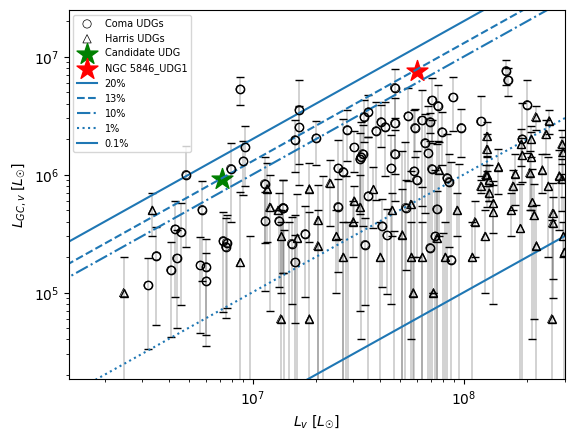

In [18]:
#Plotting points

plt.scatter(Lv, Lgc, label='Coma UDGs', facecolors='none', linewidth=0.5, color='black')
plt.scatter(Lv_H, Lgc_H, label='Harris UDGs', marker='^', facecolors='none', linewidth=0.5, color='black')
plt.scatter(Lv_ob1, Lgc_ob1, label='Candidate UDG', color='green', marker='*', s=250)
plt.scatter(Lv_5846, Lgc_5846, label='NGC 5846_UDG1', color='r', marker='*', s=250)

#Plotting error bars
plt.errorbar(Lv, Lgc, yerr=Gc_error, fmt='o', markerfacecolor='none', color='black', linewidth=0.25, capsize=3)
plt.errorbar(Lv_H, Lgc_H, yerr=Gc_error_H, fmt='^', markerfacecolor='none', color='black', linewidth=0.25, capsize=3)

Lv_min = np.min(Lv)
Lv_max = np.max(Lv)
Lgc_min = np.min(Lgc)
Lgc_max = np.max(Lgc)

min_limit = min(Lv_min, Lgc_min)
max_limit = max(Lv_max, Lgc_max + 5E+8)

print (min_limit)
print (max_limit)

#Plotting the slope of unity
plt.plot((min_limit, max_limit), (min_limit - min_limit*L_20, max_limit - max_limit*L_20), color='tab:blue', linestyle='-', label='20%')
plt.plot((min_limit, max_limit), (min_limit - min_limit*L_13, max_limit - max_limit*L_13), color='tab:blue', linestyle='--', label='13%')
plt.plot((min_limit, max_limit), (min_limit - min_limit*L_10, max_limit - max_limit*L_10), color='tab:blue', linestyle='-.', label='10%')
plt.plot((min_limit, max_limit), (min_limit - min_limit*L_1, max_limit - max_limit*L_1), color='tab:blue', linestyle=':', label='1%')
plt.plot((min_limit, max_limit), (min_limit - min_limit*L_01, max_limit - max_limit*L_01), color='tab:blue', linestyle='-', label='0.1%')

plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.gca().set_xlim(None, 3E+8)
plt.gca().set_ylim(None, 2.5E+7)

plt.xlabel('$L_{v}$ [$L_\u2609$]')
plt.ylabel('$L_{GC,v}$ [$L_\u2609$]')
plt.legend(loc='upper left', prop={'size':7})
plt.savefig('../docs/figures/GC_Mass_vs_Galaxy_Magnitude.png')
plt.savefig('../docs/figures/GC_Mass_vs_Galaxy_Magnitude.pdf')